In [72]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pickle
from MsLightweaverAdvector import MsLightweaverAdvectorHeight
from tqdm.notebook import tqdm

In [73]:
with open('/local0/scratch/cmo/MsLightweaverHeight/RadynData.pickle', 'rb') as pkl:
    atmost = pickle.load(pkl)
atmost['d1'] *= 1e10

In [74]:
from HydroWeno.Simulation import Grid
from HydroWeno.BCs import zero_grad_bc
from HydroWeno.Weno import reconstruct_weno_nm_z
from scipy.interpolate import interp1d

def simple_advection_bcs():
    lower_bc = zero_grad_bc('Lower')
    upper_bc = zero_grad_bc('Upper')
    def apply_bcs(grid, V):
        lower_bc(grid, V)
        upper_bc(grid, V)

    return apply_bcs

In [85]:
adv = MsLightweaverAdvectorHeight(atmost, simple_advection_bcs())

In [86]:
zHalf = atmost['zGrid'][::2]
d1Half = interp1d(adv.heightCc, adv.data[1, adv.grid.griBeg:adv.grid.griEnd], kind=3)(zHalf)

In [87]:
from ReadAtmost import read_atmost

In [88]:
atmostOriginal = read_atmost('/local0/scratch/cmo/MsLightweaverHeight/atmost.dat')
atmostOriginal.to_SI()
atmostOriginal.d1 *= 1e10

<IPython.core.display.Javascript object>


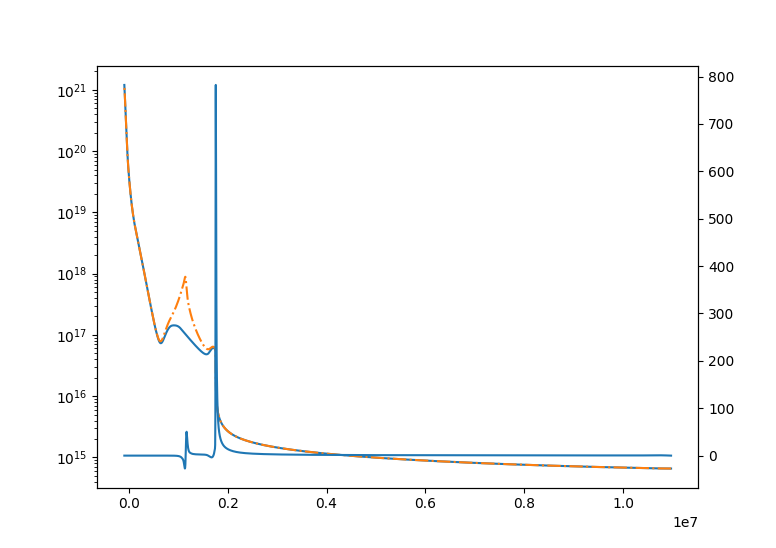

In [101]:
idx = 10
plt.figure()
# plt.semilogy(atmost['zGrid'], atmost['d1'][0])
plt.semilogy(atmost['zGrid'], atmost['ne1'][0])
# plt.semilogy(adv.heightCc, adv.data[1, adv.grid.griBeg:adv.grid.griEnd], '--')
# plt.semilogy(adv.heightCc, steps[idx][adv.grid.griBeg:adv.grid.griEnd], '--')
# plt.semilogy(atmost['zGrid'], atmost['d1'][-1], '-.')
# plt.semilogy(atmost['zGrid'], atmost['d1'][idx*10], '-.')
plt.semilogy(atmost['zGrid'], atmost['ne1'][idx*10], '-.')
# plt.semilogy(atmostOriginal.z1[idx*10], atmostOriginal.d1[idx*10], '+-')
# plt.semilogy(adv.heightCc, steps[-1][adv.grid.griBeg:adv.grid.griEnd], '--')
# plt.semilogy(atmost['zGrid'], atmost['d1'][-1], '-.')
# plt.semilogy(zHalf, d1Half, '-+')
ax2 = plt.twinx()
ax2.plot(atmost['zGrid'], atmost['vz1'][idx*10])
# ax2.plot(atmostOriginal.z1[idx*10], atmostOriginal.vz1[idx*10], '+-')

In [90]:
d1Interp = interp1d(adv.heightCc, adv.data[1, adv.grid.griBeg:adv.grid.griEnd])(atmost['zGrid'])

<IPython.core.display.Javascript object>


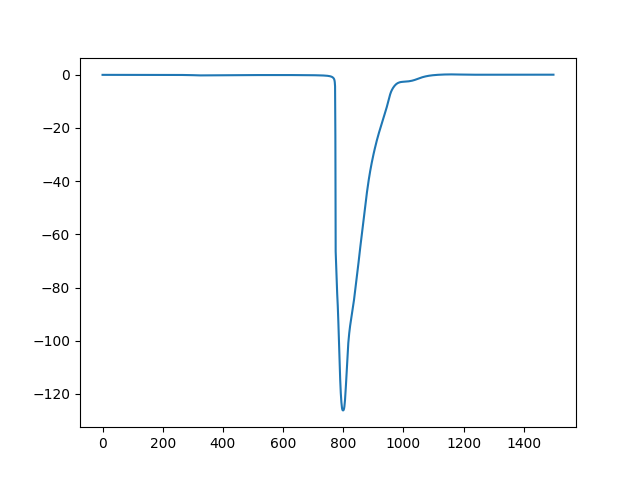

In [91]:
plt.figure()
plt.plot((d1Interp - atmost['d1'][-1]) / d1Interp)

In [92]:
steps = []
for i in tqdm(range(atmost['time'].shape[0]-1)):
    if i % 10 == 0:
        steps.append(np.copy(adv.data[1]))
    adv.step()

/home/osborne/MsLightweaver/MsLightweaverAdvector.py:9: RuntimeWarning: divide by zero encountered in true_divide
  dt = 0.8 * np.min(grid.dx / vel)


In [ ]:
adv.data[0].max()

In [ ]:
plt.figure()
plt.plot((adv.heightCc - adv.heightGrid[::-1]) / adv.heightCc)

In [ ]:
from scipy.integrate import trapz

In [ ]:
trapz(atmost['d1'][0], atmost['zGrid'])

In [ ]:
trapz(adv.data[1, adv.grid.griBeg:adv.grid.griEnd], adv.heightCc)

In [ ]:
trapz??

In [ ]:
adv.heightCc